# Plano de Trabalho: Lung Cancer Dataset (Kaggle)

## 1. Compreensão e exploração inicial
- Revisar a documentação e as colunas disponíveis.
- Calcular estatísticas básicas (média, mediana, desvio padrão, percentis).
- Visualizar distribuições das variáveis-chave (histogramas, boxplots).
- Analisar correlações entre variáveis numéricas e com a variável alvo.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
path = '/home/sam/Documents/Doctorado/GA-036/data/Lung Cancer.csv'
#path = Gabi
df = pd.read_csv(path)
df.head()

NameError: name 'pd' is not defined

a variavel id nao representa informacao relevante para nosso objetivo porem sera removida dos dados

In [ ]:
df = df.iloc[:,1:]
df.head()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0



## 2. Pré-processamento de dados
- **Limpeza de dados**:
  - Imputar valores ausentes conforme o tipo de variável.
  - Detectar e tratar valores atípicos.
- **Codificação de variáveis categóricas**:
  - Ordinal encoding, se aplicável.
  - One-hot encoding para variáveis sem ordem.
- **Normalização ou padronização**:
  - Z-score ou min-max scaling conforme o modelo.
- **Engenharia de atributos**:
  - Criar variáveis derivadas (ex.: idade em faixas).
  - Reduzir dimensionalidade se necessário.


## 3. Análise exploratória aprofundada
- Analisar relações entre variáveis e a variável alvo.
- Usar gráficos avançados (gráficos de violino, barras empilhadas, heatmaps, pairplots).
- Detectar viés ou desbalanceamento de classes.


## 4. Modelagem preditiva
- **Definir o problema**:
  - Classificação (mortalidade sim/não) ou regressão (tempo de sobrevivência).
- **Divisão dos dados**:
  - Train/test e validação cruzada (k-fold CV).
- **Modelos a testar**:
  - Regressão logística, árvores de decisão, random forest, gradient boosting (XGBoost, LightGBM), SVM, redes neurais.
- **Ajuste de hiperparâmetros**:
  - Grid Search ou Random Search com CV.
- **Avaliação de desempenho**:
  - Métricas de classificação: acurácia, precisão, recall, F1, AUC-ROC.
  - Métricas de regressão: RMSE, MAE, R².


## 5. Interpretação e explicabilidade
- Obter importância das variáveis (coeficientes, SHAP, LIME).
- Analisar curvas ROC e limiares de decisão.
- Documentar padrões relevantes encontrados.


## 6. Validação final e robustez
- Avaliar no conjunto de teste independente.
- Analisar erros (falsos positivos/negativos).
- Comparar desempenho entre treino e teste para detectar overfitting.


## 7. Apresentação e relatório final
- Incluir visualizações-chave (barras, heatmaps, importância de variáveis, curvas ROC).
- Resumir o fluxo de trabalho e os principais achados.
- Apresentar conclusões e recomendações.
- Sugerir melhorias futuras e possíveis novas variáveis a serem coletadas.

nao existe dados nulos nas colunas porem nao ha necessidade de fazer imputacao dos dados


In [ ]:
df.country.value_counts()

country
Malta             33367
Ireland           33243
Portugal          33208
France            33199
Sweden            33161
Croatia           33138
Greece            33052
Spain             33042
Netherlands       33040
Denmark           33024
Slovenia          33005
Belgium           32986
Hungary           32981
Romania           32963
Poland            32949
Italy             32948
Germany           32940
Estonia           32893
Czech Republic    32885
Lithuania         32856
Slovakia          32853
Austria           32832
Finland           32798
Luxembourg        32794
Cyprus            32719
Latvia            32565
Bulgaria          32559
Name: count, dtype: int64

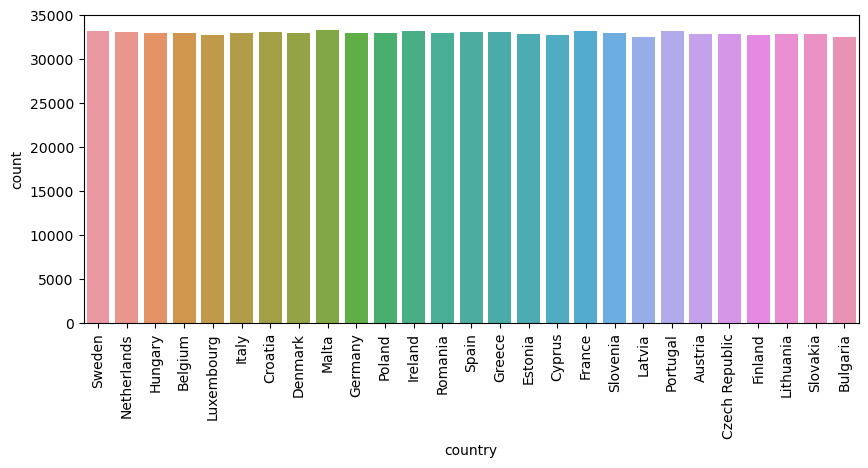

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.countplot(x='country', data=df)
plt.xticks(rotation=90) 
plt.show()

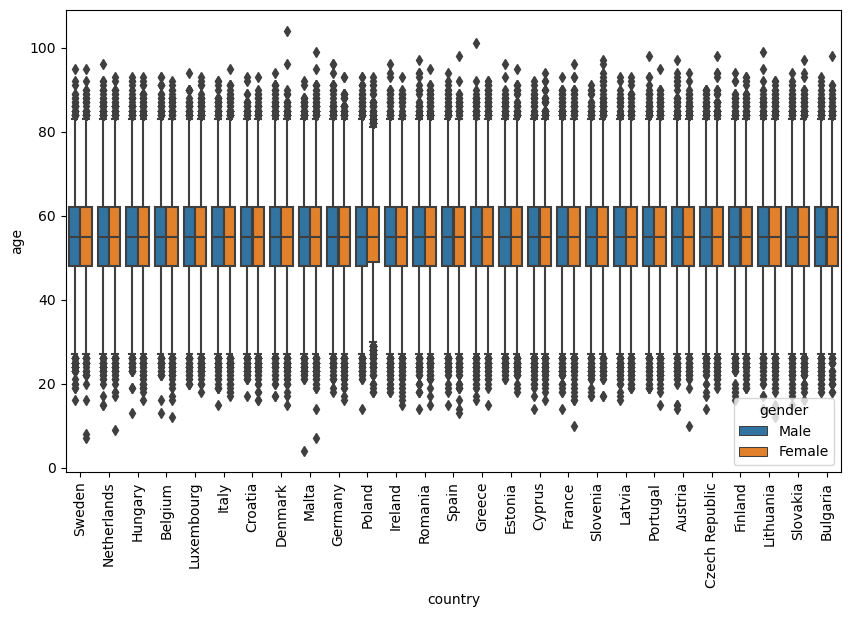

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='country',
    y='age',
    hue='gender'
)
plt.xticks(rotation=90) 
plt.show()


/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


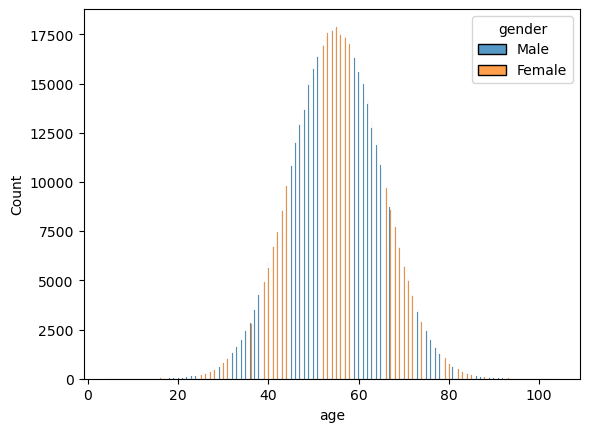

In [ ]:
sns.histplot(
    data=df,
    x='age',           # variable numérica
    hue='gender',      # varón / mujer
    multiple='dodge',  # barras lado a lado
    shrink=0.8,
)
plt.show()